In [57]:
import numpy as np
from ipywidgets import interact
import seaborn as sns; sns.set()
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
# define pAA, pAB, pBB
# A's are zeros, B's are ones

pAA = -1
pBB = -1
pAB = -1.5

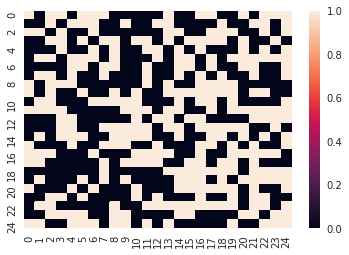

In [59]:
# lattice initialisation

n=25

#lat = np.zeros([n,n])
lat = np.random.rand(n,n)<0.5
init_lat=lat

larger_lat = np.ones([n+2,n+2])*0.5

ax = sns.heatmap(lat[:,:])
plt.show()

Initial energy =  -1683.0


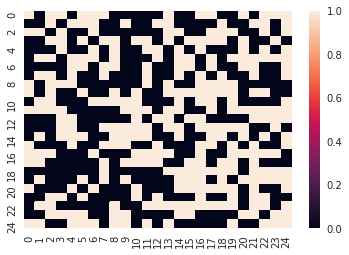

In [60]:
# Total energy calculation. Sloow

def periodic_bd(lat):
    
    larger_lat = np.ones([n+2,n+2])*0.5
    larger_lat[1:-1,1:-1] = lat
    larger_lat[1:-1,0] = lat[:,-1]
    larger_lat[1:-1,-1] = lat[:,0]
    larger_lat[0,1:-1] = lat[-1,:]
    larger_lat[-1,1:-1] = lat[0,:]
    
    return larger_lat
    

larger_lat = periodic_bd(lat)
def calc_energy_total(lat):
    
    larger_lat = periodic_bd(lat)
    energy=0
    
    for i in range(n+1):        
        for j in range(n+1):
            
            energy += (larger_lat[i,j]==larger_lat[i+1,j]==0)*pAA + \
            (larger_lat[i,j]==larger_lat[i+1,j]==1)*pBB + \
            ((larger_lat[i,j]!=larger_lat[i+1,j])&(larger_lat[i+1,j]!=0.5))*pAB + \
            (larger_lat[i,j]==larger_lat[i,j+1]==0)*pAA + \
            (larger_lat[i,j]==larger_lat[i,j+1]==1)*pBB + \
            ((larger_lat[i,j]!=larger_lat[i,j+1])&(larger_lat[i,j+1]!=0.5))*pAB
            
    return energy

initial_energy = calc_energy_total(lat)

print("Initial energy = ", initial_energy)

ax = sns.heatmap(init_lat)
plt.show()

In [61]:
def calc_energy_one(i1,j1,larger_lat):
    
    energy = (larger_lat[i1,j1]==larger_lat[i1+1,j1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1+1,j1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1+1,j1])&(larger_lat[i1+1,j1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1,j1+1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1,j1+1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1,j1+1])&(larger_lat[i1,j1+1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1,j1-1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1,j1-1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1,j1-1])&(larger_lat[i1,j1-1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1-1,j1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1-1,j1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1-1,j1])&(larger_lat[i1-1,j1]!=0.5))*pAB
    
    return energy

calc_energy_one(6,10,larger_lat)

-4.5

In [62]:
# probability distribution for exchange. If delta_g is -ve, probability is 1
# If +ve probability exponentially decays with delta_g

def probability_function(delta_g,kT):
    
    #print("exp(-delt_g/kT = )",np.exp(-delta_g/kT))
    if (delta_g<=0):
        
        return True
    
    elif (np.random.random()<np.exp(-delta_g/kT)):
        
        return True
    
    else:
        
        return False

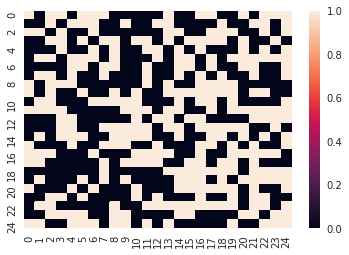

In [63]:
def iteration(lat,kT):
    
    swap1 = np.random.randint(0,n,2)
    swap2 = np.random.randint(0,n,2)

    #swapping, creating lat and old lat

    old_larger_lat = periodic_bd(lat)
    
    temp = lat[swap1[0]][swap1[1]]
    lat[swap1[0]][swap1[1]] = lat[swap2[0]][swap2[1]]
    lat[swap2[0]][swap2[1]] = temp
    
    larger_lat = periodic_bd(lat)

    
    delta_g = (calc_energy_one(swap1[0]+1,swap1[1]+1,larger_lat)+ \
    calc_energy_one(swap2[0]+1,swap2[1]+1,larger_lat)) \
    -(calc_energy_one(swap1[0]+1,swap1[1]+1,old_larger_lat)+ \
    calc_energy_one(swap2[0]+1,swap2[1]+1,old_larger_lat))
    
    #print("delta_g = ",delta_g)
    
    if (probability_function(delta_g,kT)):
        
        #print("choosing new_lat")
        return larger_lat[1:-1,1:-1]
    
    else:
        #print("choosing old_lat")
        return old_larger_lat[1:-1,1:-1]
    
ax = sns.heatmap(iteration(lat,0.01))
plt.show()
    

In [68]:
total_time = 6000
record = np.zeros([n,n,total_time])
energies = np.zeros(total_time)

kT = 10

for i in range(total_time):
    
    global lat
    record[:,:,i] = lat
    lat = iteration(lat,kT)

In [69]:
def heat(x):
    ax = sns.heatmap(record[:,:,x])
    plt.show()


interact(heat,x=(0,record.shape[2]-1,1))

A Jupyter Widget

<function __main__.heat>

In [66]:
total_time = 6000
record = np.zeros([n,n,total_time])
energies = np.zeros(total_time)

kT = 0.01

for i in range(total_time):
    
    global lat
    record[:,:,i] = lat
    lat = iteration(lat,kT)

In [67]:
def heat(x):
    ax = sns.heatmap(record[:,:,x])
    plt.show()


interact(heat,x=(0,record.shape[2]-1,1))

A Jupyter Widget

<function __main__.heat>